In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.head(3)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731


In [ ]:
df.tail(10)

,YearsExperience,Salary
20,6.8,91738
21,7.1,98273
22,7.9,101302
23,8.2,113812
24,8.7,109431
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
df.shape

(30, 2)

In [ ]:
x=df.drop('Salary',axis=1)
y=df['Salary']

In [ ]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [ ]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


Standardization


In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=Scaler.fit_transform(x)
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Model Creation**

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Prediction

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

Error Detection


In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

12823412.298126549

In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
import seaborn as sns
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


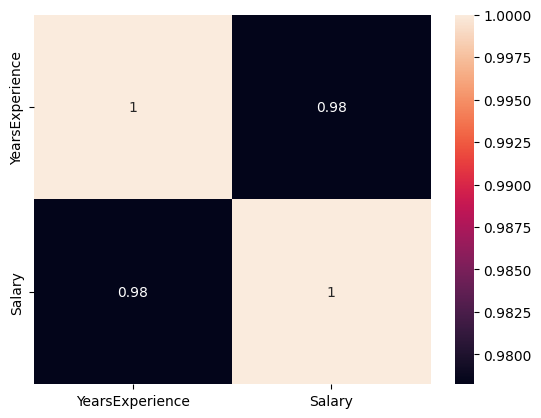

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

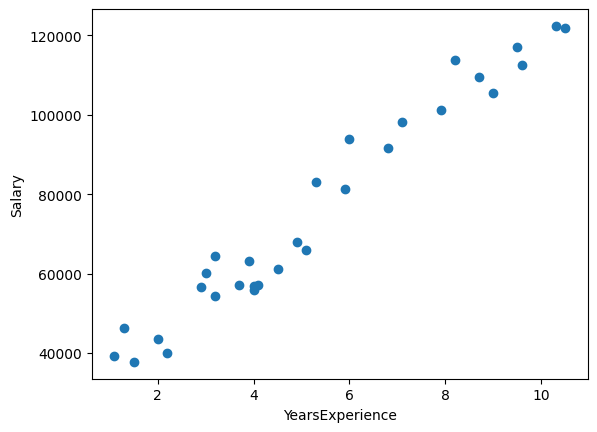

In [ ]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn import metrics


In [ ]:
r2=metrics.r2_score(y_test,y_pred)
r2

0.988169515729126

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

12823412.298126549

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

2446.1723690465064

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

np.float64(3580.979237321343)

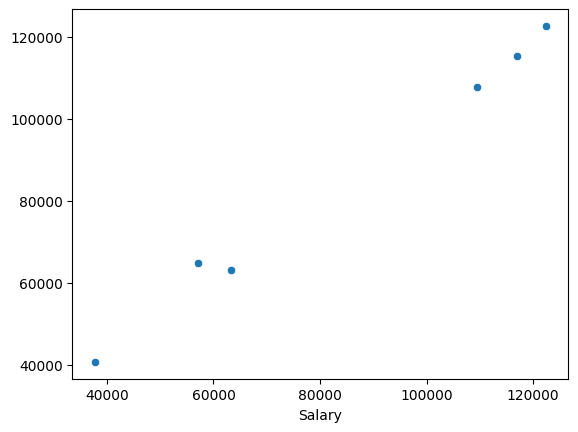

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

In [ ]:
sns.regplot

<function seaborn.regression.regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)>